In [1]:
%run ./utility.ipynb

In [2]:
n = 256

a = np.linspace(-50, 50, n)
x, y = np.meshgrid(a, a)

k = np.fft.fftfreq(n, a[1]-a[0])
kx, ky = np.meshgrid(k, k)

def Gaussian(sigma, x0=0, y0=0):
    dx = x - x0
    dy = y - y0
    return np.exp(-0.5 * (dx*dx + dy*dy) / (sigma * sigma))

def ring(nn=0.01):
    return np.maximum(Gaussian(10, *randpos(1)) - Gaussian(8, *randpos(1)), 0) + nn * noise(2)

def noise(alpha):
    white_noise = np.random.rand(n, n)-0.5 + 1j*(np.random.rand(n, n)-0.5)
    power_law = np.power(kx*kx + ky*ky + 1e-300, -0.5 * alpha)
    power_law[0,0] = 0
    img  = np.real(np.fft.ifft2(white_noise * power_law))
    img += np.min(img)
    img /= np.max(img)
    return img

def randpos(scale=1):
    x = (np.random.rand() - 0.5) * 2 * scale
    y = (np.random.rand() - 0.5) * 2 * scale
    return x, y

Below is how we create a 256 by 256 sample image of a blackhole ring

In [3]:
ring()

array([[0.13027453, 0.13130417, 0.13328103, ..., 0.12920494, 0.12900278,
        0.12918611],
       [0.13034549, 0.13136868, 0.13294787, ..., 0.12869911, 0.12849274,
        0.12940884],
       [0.12929012, 0.13069017, 0.13216779, ..., 0.12911053, 0.12795423,
        0.1286343 ],
       ...,
       [0.13181733, 0.13204872, 0.13177572, ..., 0.13227486, 0.13188108,
        0.13130049],
       [0.12995662, 0.13078814, 0.13238065, ..., 0.13104806, 0.13072683,
        0.13010552],
       [0.12973815, 0.13143764, 0.13339032, ..., 0.12969032, 0.12944706,
        0.12917118]])

Here, we load a precreated sample image

(-0.5, 255.5, 255.5, -0.5)

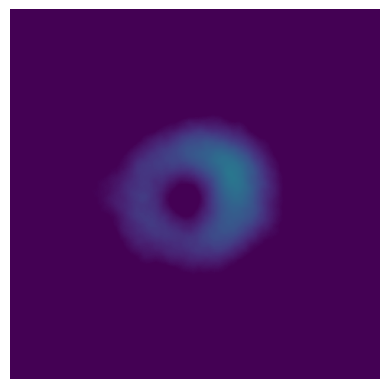

In [4]:
sample = np.loadtxt("sample_image.csv", delimiter=",")
plt.figure()
plt.imshow(sample, vmin=0, vmax=0.5)
plt.axis('off')

To test interpolate on a sample image, we test with arbitrarily chosen coordinates

In [5]:
samp = np.array(sample)
samp_blank = samp * 0
samp_coords = [[1.81243945e-03+0.j, -1.65010891e-02-0.01426895j]]
temp_1 = interpolate(samp, samp_coords, 100 * u.uas)
print(temp_1)
temp_2 = interpolate(samp_blank, samp_coords, 100 * u.uas)
print(temp_2)

[-167.49085714-175.33813211j]
[0.+0.j]


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scipy/interpolate/_rgi.py:374: ComplexWarning: Casting complex values to real discards the imaginary part
  xi = np.asarray(xi, dtype=float)


Code to test loss

In [6]:
sample_coords = []
sample_data_list = []
print(loss(samp, sample_data_list, sample_coords))
print(loss(samp_blank, sample_data_list, sample_coords))

NameError: name 'loss' is not defined